# 1- Importing Libraries

In [ ]:
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install matplotlib
! pip install scikit-learn
! pip install tensorflow

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# 2- Importing Dataset

In [46]:
df = pd.read_csv("Artifacts/bike_sales_100k.csv")
df.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


# 3- Preprocessing Dataset

In [47]:
df.head()
df.drop(['Sale_ID','Date','Customer_ID','Salesperson_ID'],axis=1,inplace=True)
df.head()

,Bike_Model,Price,Quantity,Store_Location,Payment_Method,Customer_Age,Customer_Gender
0,Cruiser,318.32,1,Philadelphia,Apple Pay,70,Female
1,Hybrid Bike,3093.47,4,Chicago,Apple Pay,37,Male
2,Folding Bike,4247.99,3,San Antonio,PayPal,59,Female
3,Mountain Bike,1722.01,3,San Antonio,Apple Pay,19,Male
4,BMX,3941.44,3,Philadelphia,PayPal,67,Female


In [48]:
df.isnull().sum()

Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Payment_Method     0
Customer_Age       0
Customer_Gender    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

<Axes: ylabel='Price'>

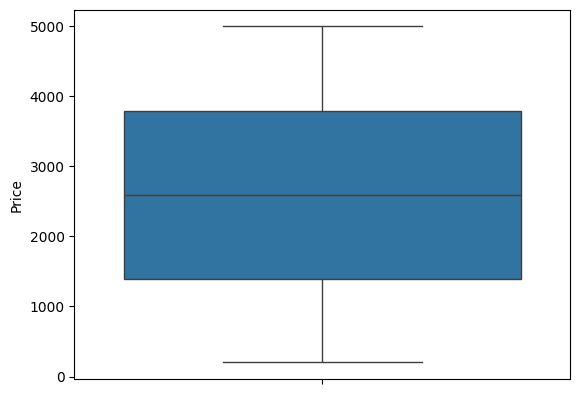

In [49]:
# Checking for Outliers
sns.boxplot(df["Price"])

# 4- Encoding the Dataset

In [50]:
dummy1= pd.get_dummies(df["Bike_Model"],dtype=int,drop_first=True)
dummy1

,Cruiser,Electric Bike,Folding Bike,Hybrid Bike,Mountain Bike,Road Bike
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
99995,0,0,0,1,0,0
99996,0,0,0,0,0,1
99997,0,0,1,0,0,0
99998,0,0,0,1,0,0


In [51]:
 df["Payment_Method"].unique()

array(['Apple Pay', 'PayPal', 'Google Pay', 'Debit Card', 'Credit Card',
       'Cash'], dtype=object)

In [52]:
dummy2 = pd.get_dummies(df["Payment_Method"],dtype=int,drop_first=True)
dummy2

,Cash,Credit Card,Debit Card,Google Pay,PayPal
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
99995,0,0,0,0,1
99996,0,1,0,0,0
99997,0,0,0,1,0
99998,0,1,0,0,0


In [53]:
dummy3 = pd.get_dummies(df["Store_Location"],dtype=int,drop_first=True)
dummy3

,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio
0,0,0,0,1,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
99995,0,0,0,1,0,0
99996,0,0,0,0,1,0
99997,0,0,0,0,1,0
99998,0,0,0,1,0,0


In [54]:
df["Customer_Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [55]:
encoder = OneHotEncoder(sparse_output=False,drop="first",dtype=int)
df["Female"]= encoder.fit_transform(df[["Customer_Gender"]])
df.drop("Customer_Gender",axis=1,inplace=True)

In [57]:
df_new = pd.concat([df,dummy1,dummy2,dummy3],axis=1)
df_new.drop(['Bike_Model','Store_Location','Payment_Method'],axis=1,inplace=True)

In [58]:
df_new

,Price,Quantity,Customer_Age,Female,Cruiser,Electric Bike,Folding Bike,Hybrid Bike,Mountain Bike,Road Bike,...,Credit Card,Debit Card,Google Pay,PayPal,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio
0,318.32,1,70,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3093.47,4,37,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4247.99,3,59,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1722.01,3,19,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3941.44,3,67,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3088.13,2,60,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
99996,1051.44,2,67,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
99997,2783.79,4,37,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
99998,4265.42,4,57,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


# Scaling the Values

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['Customer_Age', 'Quantity']

df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])

,Price,Quantity,Customer_Age,Female,Cruiser,Electric Bike,Folding Bike,Hybrid Bike,Mountain Bike,Road Bike,...,Credit Card,Debit Card,Google Pay,PayPal,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio
0,318.32,0.00,1.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3093.47,0.75,0.365385,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4247.99,0.50,0.788462,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1722.01,0.50,0.019231,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3941.44,0.50,0.942308,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3088.13,0.25,0.807692,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
99996,1051.44,0.25,0.942308,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
99997,2783.79,0.75,0.365385,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
99998,4265.42,0.75,0.750000,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


# 5- Splitting Dataset for Training /Testing

In [62]:
from sklearn.model_selection import train_test_split
X = df_new.drop(['Price'],axis=1)
X

,Quantity,Customer_Age,Female,Cruiser,Electric Bike,Folding Bike,Hybrid Bike,Mountain Bike,Road Bike,Cash,Credit Card,Debit Card,Google Pay,PayPal,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio
0,0.00,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.75,0.365385,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.50,0.788462,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.50,0.019231,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0.50,0.942308,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.25,0.807692,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
99996,0.25,0.942308,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
99997,0.75,0.365385,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
99998,0.75,0.750000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
